### Plot the magnetization of a halbach array, and add the magnetization of shimming sphere

In [320]:
def mSymFunc(m,factors=1, flipDipolexy=False, symmetryAngle=np.pi / 3):
   # phiSym = phi0 + (-symmetryAngle) * factors  # symmetryAngle to rotate the dipole position by
   deltaTheta = -symmetryAngle * factors  # symmetryAngle to rotate the dipole direction vector by
   mSym = m.copy()
   MRot = np.array([[np.cos(deltaTheta), -np.sin(deltaTheta)], [np.sin(deltaTheta), np.cos(deltaTheta)]])
   mSym = MRot @ mSym
   if flipDipolexy == True:
       mSym = -mSym
   print(m,mSym)
   return mSym

[ 0.92369335 -0.3831326 ] [ 0.92369335 -0.3831326 ]
[ 0.92369335 -0.3831326 ] [-0.13004411  0.99150821]
[ 0.92369335 -0.3831326 ] [-0.79364924 -0.60837561]


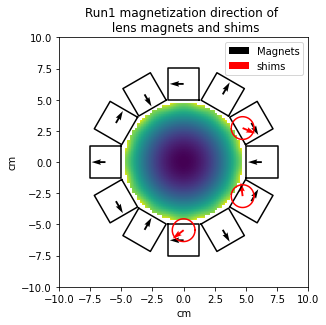

In [322]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon,Point
from shapely.affinity import rotate
from HalbachLensClass import Layer

rp=(.05,)
width=.0254

thetaArr = np.linspace(0, 2 * np.pi, 12, endpoint=False)  # location of 12 magnets
thetaArr=thetaArr.reshape(-1,len(rp)).T
phiArr = np.pi + np.arange(0, 12) * 2 * np.pi / 3 #direction of magnetization
phiArr=phiArr.reshape(-1,len(rp)).T
quiverData=[]
for r,r_phi,r_theta in zip(rp,phiArr,thetaArr):
    for phi,theta in zip(r_phi,r_theta):
        x,y=(r+width/2)*np.cos(theta)*1e2,(r+width/2)*np.sin(theta)*1e2
        quiverData.append([x,y,np.cos(phi),np.sin(phi)])
quiverData=np.asarray(quiverData)

squareCoords=np.asarray([(rp[0],-width/2),(rp[0]+width,-width/2),(rp[0]+width,width/2),(rp[0],width/2)])*1e2
squareOriginal=Polygon(squareCoords)
angleArr=np.linspace(0,np.pi*2,13)[:-1]
for angle in angleArr[:]:
    square=rotate(squareOriginal,angle,origin=(0,0),use_radians=True)
    plt.plot(*square.exterior.xy,c='black')





plt.quiver(*quiverData.T,label='Magnets')
rShim=.0546
phi0=np.pi/6
radius=.911
psi0=5.89
point0=Point([1e2*rShim,0])
phiArr=phi0+np.linspace(0.0,2*np.pi,7)[1:]
phiArr=np.flip(phiArr)

assert abs(abs(phiArr[1]-phiArr[0])-np.pi/3)<1e-6
psi=psi0
m=np.asarray([np.cos(psi),np.sin(psi)])
quiverData=[]
i=0
booList=[False,True]*5
for phi in phiArr[:3]:
    point=rotate(point0,phi,origin=(0.0,0.0),use_radians=True)
    plt.plot(*point.buffer(radius).exterior.xy,c='r')
    x,y=1e2*rShim*np.cos(phi),1e2*rShim*np.sin(phi)
    mSym=mSymFunc(m,factors=i,flipDipolexy=booList[i])
    quiverData.append([x,y,*mSym])
    i+=1
quiverData=np.asarray(quiverData)
plt.quiver(*quiverData.T,color='r',label='shims')# plt.quiver(quiverData[:,0],quiverData[:,1],quiverData[:,2],quiverData[:,3],color='r',label='shims')

layer=Layer(0.0,width,.5,rp)
xArr=np.linspace(-rp[0],rp[0],50)
coords=np.asarray(np.meshgrid(xArr,xArr,0.0)).T.reshape(-1,3)
BVec=layer.B(coords)
B=np.linalg.norm(BVec,axis=1)
B[np.linalg.norm(coords,axis=1)>rp[0]*.99]=np.nan
B=B.reshape(len(xArr),len(xArr))
plt.imshow(B,extent=[min(xArr)*100.0,max(xArr)*100.0]*2)
# BxGrid=BVec[:,0].reshape(len(xArr),len(xArr))
# ByGrid=BVec[:,1].reshape(len(xArr),len(xArr))
# plt.streamplot(xArr*1e2,xArr*1e2,BxGrid,ByGrid,density=.8)

plt.gca().set_aspect('equal')
plt.tight_layout()
plt.legend()
plt.xlabel('cm')
plt.ylabel('cm')
plt.title('Run1 magnetization direction of \n lens magnets and shims')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

In [256]:
booList

[True, False, True, False, True, False, True, False, True, False]

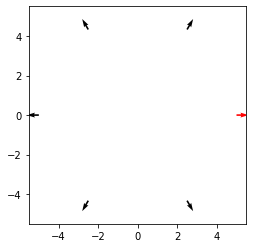

In [70]:
import matplotlib.pyplot as plt
import numpy as np
phi0=0*np.pi/2
r=5.0
theta0=0*np.pi/2
m=np.asarray([np.cos(phi0),np.sin(phi0)])
x,y=r*np.cos(theta0),r*np.sin(theta0)
phiArr=np.arange(0, 6) * 4 * np.pi / 3
def B_Symmetry(r,rotations,rotationAngle=np.pi/3):
    xSym,ySym=r*np.cos(rotationAngle*rotations),r*np.sin(rotationAngle*rotations)
    if rotations%2==1:
        mu = np.tan(rotations*rotationAngle/2)
        M_uc = np.asarray([[1 - mu ** 2, 2 * mu], [2 * mu, mu ** 2 - 1]]) * 1 / (1 + mu ** 2)  # reflection matrix
        mSym=M_uc@m
    else:
        M_Angle=rotationAngle*rotations
        MRot = np.array([[np.cos(M_Angle), -np.sin(M_Angle)], [np.sin(M_Angle), np.cos(M_Angle)]])
        mSym=MRot@m
    # if rotations%2==0:
    #     mSym=-mSym
    # mSym=np.asarray([np.cos(phi0+phiArr[rotations]),np.sin(phi0+phiArr[rotations])])
    plt.quiver(xSym,ySym,*mSym)
B_Symmetry(r,1)
B_Symmetry(r,2)
B_Symmetry(r,3)
B_Symmetry(r,4)
B_Symmetry(r,5)

plt.quiver(x,y,*m,color='r')
plt.gca().set_aspect('equal')
# plt.tight_layout()
plt.xlim([-1.1*r,1.1*r])
plt.ylim([-1.1*r,1.1*r])
plt.show()



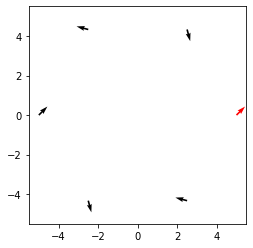

In [84]:
import matplotlib.pyplot as plt
import numpy as np
phi0=.5*np.pi/2
r=5.0
theta0=0*np.pi/2
m=np.asarray([np.cos(phi0),np.sin(phi0)])
x,y=r*np.cos(theta0),r*np.sin(theta0)
def B_Symmetry(r,rotations,rotationAngle=np.pi/3):
    xSym,ySym=r*np.cos(rotationAngle*rotations),r*np.sin(rotationAngle*rotations)
    M_Angle=rotationAngle*rotations
    MRot = np.array([[np.cos(M_Angle), -np.sin(M_Angle)], [np.sin(M_Angle), np.cos(M_Angle)]])
    mSym=MRot@m
    mSym*=(-1)**rotations
    # if rotations%2==0:
    #     mSym=-mSym
    # mSym=np.asarray([np.cos(phi0+phiArr[rotations]),np.sin(phi0+phiArr[rotations])])
    plt.quiver(xSym,ySym,*mSym)
B_Symmetry(r,1)
B_Symmetry(r,2)
B_Symmetry(r,3)
B_Symmetry(r,4)
B_Symmetry(r,5)

plt.quiver(x,y,*m,color='r')
plt.gca().set_aspect('equal')
# plt.tight_layout()
plt.xlim([-1.1*r,1.1*r])
plt.ylim([-1.1*r,1.1*r])
plt.show()



In [8]:
import numpy as np

a=np.array([0.22335083, 0.05468504, 0.01778291, 1.86398975, 5.89642321])
b=np.array([0.22336635, 0.05398954, 0.01994955, 2.174386  , 5.1246072 ])
c=np.array([0.22336904, 0.05486956, 0.01967456, 1.16595304, 4.66104557])
d=np.array([0.22232782 ,0.05411236 ,0.01467107 ,1.69968186 ,5.40909307])
e=np.array([0.2228413  ,0.05462561 ,0.01132046 ,1.28740702 ,5.31414559])
arr=np.column_stack((a,b,c,d,e))
np.std(arr,axis=1),np.mean(arr,axis=1)

(array([4.14115074e-04, 3.42908512e-04, 3.27518627e-03, 3.71033510e-01,
        4.01261604e-01]),
 array([0.22305107, 0.05445642, 0.01667971, 1.63828353, 5.28106293]))

In [11]:
#locked phi,locked theta, variable radius
a=np.array([0.2425    , 0.06891085, 0.02262274, 3.05662444, 0.02194268,
            0.06575895, 0.04839916, 5.17701814, 0.0254,.08078    ])
e=np.zeros(len(a))*np.nan
e[0]=.23
e[-1]=1.0

rowLabels=['L', 'r', 'deltaZ','psi','radius','r', 'deltaZ','psi','radius','cost']
colLabels=['param,SI','run1','baseline lens']
cellText=[]




cellText=[rowLabels,arrToStr(a),arrToStr(e)]
cellText=list(zip(*cellText))
fig, ax = plt.subplots()
ax.set_axis_off()
ax.table(cellText=cellText,cellLoc ='center',loc ='upper left',colLabels=colLabels)
plt.savefig('poop',dpi=100)
plt.show()

5.235987755982989

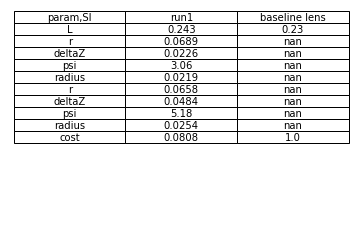

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from collections.abc import Iterable
def numIterToStrIter(iterable,sigfigs=3):
    #converts an iterable (array, list, etc) of numbers to a list of string with approrpiate
    #sigfigs
    assert isinstance(iterable,Iterable)
    import sigfig
    temp=lambda x:sigfig.round(x,sigfigs=sigfigs) if np.isnan(x)==False else x
    roundedVals=list(map(temp,iterable))
    stringVals= list(map(str,roundedVals))
    return stringVals
def make_Numeric_Table(columnList,colLabels,rowLabels,saveName=None):
    #columnList: List of iterables (array, list, etc) that correspond to each column
    #colLabels: list of labels along column. Must be the same length as columnList=1 for first row label
    #list of row labels. Must be as long as each entry in columnList
    assert all(isinstance(val,Iterable) for val in (columnList,colLabels,rowLabels))
    assert all(isinstance(val,str) for val in colLabels)
    assert all(isinstance(val,str) for val in rowLabels)
    assert all(isinstance(column,Iterable) for column in columnList)
    assert all(len(column)==len(columnList[0]) for column in columnList)
    assert all(len(column)==len(rowLabels) for column in columnList)
    assert len(colLabels)==len(columnList)+1
    columnTextList=[rowLabels]
    columnTextList.extend([numIterToStrIter(column) for column in columnList])
    cellText=list(zip(*columnTextList)) #shape the data. Needs to be transposed
    fig, ax = plt.subplots()
    ax.set_axis_off()
    ax.table(cellText=cellText,cellLoc ='center',loc ='upper left',colLabels=colLabels)
    if saveName is not None:
        plt.savefig(saveName,dpi=100)
    plt.show()


a=np.array([0.2425    , 0.06891085, 0.02262274, 3.05662444, 0.02194268,
            0.06575895, 0.04839916, 5.17701814, 0.0254,.08078    ])
e=np.zeros(len(a))*np.nan
e[0]=.23
e[-1]=1.0
colLabels=['param,SI','run1','baseline lens']
rowLabels=['L', 'r', 'deltaZ','psi','radius','r', 'deltaZ','psi','radius','cost']
make_Numeric_Table([a,e],colLabels,rowLabels)

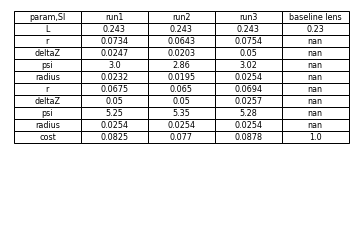

In [24]:
a=np.array([0.2425    , 0.0734319 , 0.02472821, 3.00462996, 0.02320769,
         0.06748556, 0.05      , 5.24957841, 0.0254    ,0.08247060785300939])
b=np.array([0.2425    , 0.06432957, 0.02027348, 2.85786667, 0.0195204 ,
            0.06495041, 0.05      , 5.34821609, 0.0254,0.07703322061948606    ])
c=np.array([0.2425    , 0.0754    , 0.05      , 3.02219666, 0.0254    ,
            0.06936644, 0.02574783, 5.2818026 , 0.0254  ,0.08775380624949233  ])
e=np.zeros(len(a))*np.nan
e[0]=.23
e[-1]=1.0
colLabels=['param,SI','run1','run2','run3','baseline lens']
rowLabels=['L', 'r', 'deltaZ','psi','radius','r', 'deltaZ','psi','radius','cost']
make_Numeric_Table([a,b,c,e],colLabels,rowLabels,saveName='poop')